<a href="https://colab.research.google.com/github/GeeK1224/cau_ml_project/blob/main/cau_ml_project_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
from torchvision.transforms import transforms
import torchvision

In [302]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [5]:
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
!wget https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/sample_submission.csv

--2023-12-16 08:09:19--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_test_features_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216168 (211K) [text/plain]
Saving to: ‘kaggle_test_features_public.csv’

kaggle_test_feature 100%[===================>] 211.10K  --.-KB/s    in 0.03s   

2023-12-16 08:09:19 (7.94 MB/s) - ‘kaggle_test_features_public.csv’ saved [216168/216168]

--2023-12-16 08:09:19--  https://raw.githubusercontent.com/GeeK1224/cau_ml_project/main/kaggle_train_data_public.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request 

## ml model team ATES

In [258]:
# Data Collection
test_data = pd.read_csv("kaggle_test_features_public.csv")
train_data = pd.read_csv("kaggle_train_data_public.csv")
sample = pd.read_csv("sample_submission.csv")

In [259]:
def one_hot_encode_column(dataframe, column_name):
    """
    Perform one-hot encoding on a specific column of a DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the column to one-hot encode

    Returns:
    - dataframe_encoded: pandas DataFrame, the DataFrame with the specified column one-hot encoded
    """

    # Make a copy of the DataFrame to avoid modifying the original
    dataframe_copy = dataframe.copy()

    # Perform one-hot encoding
    dataframe_encoded = pd.get_dummies(dataframe_copy, columns=[column_name], prefix=column_name)

    return dataframe_encoded

In [260]:
def zeros_and_ones(dataframe, column_name):

  # Make a copy of the DataFrame to avoid modifying the original
  dataframe_copy = dataframe.copy()

  # Perform turning values to zeros and ones
  dataframe_copy[column_name].replace('Yes', 1, inplace=True)
  dataframe_copy[column_name].replace('No', 0, inplace=True)

  return dataframe_copy

In [261]:
# Feature engineering Test Data
drop_columns = ["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude"]
category_yes_no = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
categories_many = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

test_data = test_data.copy()
for category in category_yes_no:
  test_data = zeros_and_ones(test_data, category)


for category in categories_many:
  test_data = one_hot_encode_column(test_data, category)

encode_test = test_data.drop(drop_columns, axis=1)
encode_test


,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Gender_Female,Gender_Male,Multiple Lines_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,51,0,1,30.05,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,49,1,1,99.05,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,60,1,1,116.60,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,1,0,45,1,1,54.15,1,0,1,...,1,0,0,0,1,0,0,1,0,0
4,0,1,1,31,1,0,25.75,0,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,1,0,34,1,0,62.65,1,0,0,...,1,0,0,1,0,0,0,0,1,0
982,0,0,1,9,1,0,55.35,0,1,1,...,1,0,0,1,0,0,0,0,1,0
983,1,1,0,23,1,1,95.10,1,0,1,...,0,0,1,1,0,0,0,0,1,0
984,0,0,0,21,1,1,99.15,1,0,1,...,0,0,1,1,0,0,1,0,0,0


In [262]:
# Feature engineering Train Data
drop_columns = ["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", "Latitude", "Longitude"]
category_yes_no = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
categories_many = ['Gender', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

train_data = train_data.copy()
for category in category_yes_no:
  train_data = zeros_and_ones(train_data, category)


for category in categories_many:
  train_data = one_hot_encode_column(train_data, category)

encode_train = train_data.drop(drop_columns, axis=1)
encode_train

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Score,Churn Value,CLTV,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,1,21,1,0,80.35,62,0,4579,...,1,0,0,1,0,0,0,0,1,0
1,0,0,1,9,1,0,93.00,40,0,2267,...,0,0,1,1,0,0,1,0,0,0
2,0,1,0,69,1,1,106.40,26,0,4328,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,9,1,1,75.85,70,0,5212,...,1,0,0,1,0,0,0,0,1,0
4,0,1,0,5,1,0,20.10,42,0,2894,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,0,0,0,3,1,0,55.35,65,1,5787,...,1,0,0,1,0,0,0,0,1,0
3940,0,1,0,24,1,1,93.00,29,0,5886,...,0,0,1,1,0,0,0,0,1,0
3941,0,0,0,1,1,1,45.70,95,1,2295,...,1,0,0,1,0,0,0,0,0,1
3942,1,1,0,47,1,1,67.45,67,0,4074,...,1,0,0,1,0,0,0,1,0,0


In [263]:
# deviding data to X and y
# Попробуйте с CLTV и без
targets = ['Churn Score', 'Churn Value' ,'CLTV', 'Churn Reason']

X = encode_train.drop(targets, axis=1)
y = encode_train['Churn Value']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE

In [265]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [266]:
from imblearn.over_sampling import SMOTE

In [267]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
0    2038
1     722
Name: Churn Value, dtype: int64

Class distribution after SMOTE:
0    2038
1    2038
Name: Churn Value, dtype: int64


# XGBoost

In [251]:
from xgboost import XGBClassifier

In [252]:
# Create an XGBoost classifier
model = XGBClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)c

# Make predictions on the test set
y_pred = model.predict(X_test)

In [253]:
X_resampled_combined = np.concatenate((X_train_resampled, X_test), axis=0)
y_resampled_combined = np.concatenate((y_train_resampled, y_test), axis=0)

# Perform k-fold cross-validation (let's say k=5)
k = 5
cv_scores = cross_val_score(model, X_resampled_combined, y_resampled_combined, cv=k, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Scores: [0.74239544 0.83745247 0.90969582 0.90494297 0.79657795]
Mean Accuracy: 0.8382


# AUC ROC

Accuracy: 0.7863
Precision: 0.6174
Recall: 0.5697
F1 Score: 0.5926
AUC-ROC: 0.8265


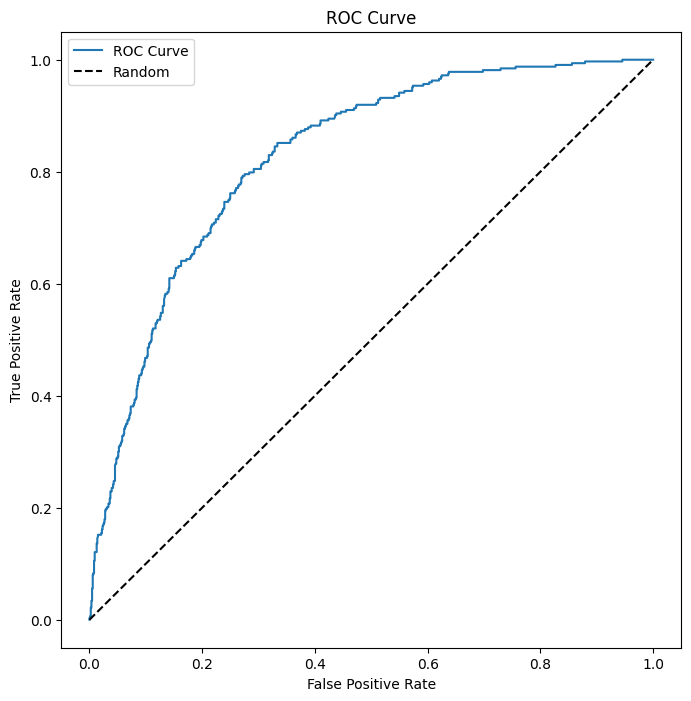

In [254]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# TEST DATA

In [220]:
probabilities = model.predict_proba(encode_test)[:, 1]

In [221]:
data_id_pred = {'ID': range(986), 'Churn Value': probabilities}

pred_data_csv = pd.DataFrame(data=data_id_pred)

compression_opts1 = dict(method='zip', archive_name='pred.csv')
pred_data_csv.to_csv('pred.zip', index=False, compression=compression_opts1)

# Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

In [236]:
X_resampled_combined = np.concatenate((X_train_resampled, X_test), axis=0)
y_resampled_combined = np.concatenate((y_train_resampled, y_test), axis=0)

# Perform k-fold cross-validation (let's say k=5)
k = 5
cv_scores = cross_val_score(model, X_resampled_combined, y_resampled_combined, cv=k, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Scores: [0.77946768 0.83269962 0.90494297 0.90779468 0.77851711]
Mean Accuracy: 0.8407


Accuracy: 0.7863
Precision: 0.6174
Recall: 0.5697
F1 Score: 0.5926
AUC-ROC: 0.8102


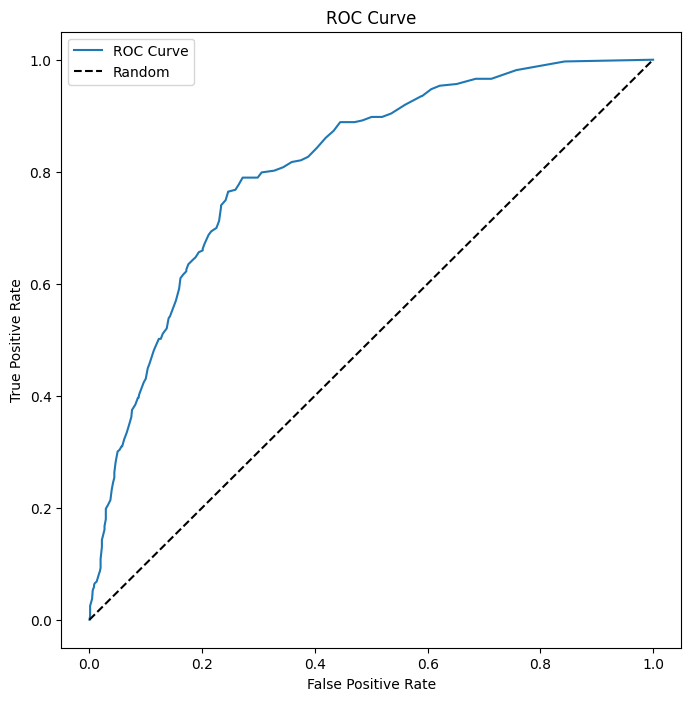

In [237]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [291]:
from sklearn import preprocessing

In [292]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [293]:
model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train_resampled)
y_pred = model.predict(X_test_scaled)

In [295]:
X_combined = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
y_combined = np.concatenate((y_train_resampled, y_test), axis=0)

# Perform k-fold cross-validation (let's say k=5)
k = 5
cv_scores = cross_val_score(model, X_combined, y_combined, cv=k, scoring='accuracy')

# Display cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Scores: [0.74904943 0.83460076 0.90779468 0.89638783 0.78612167]
Mean Accuracy: 0.8348


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.7863
Precision: 0.6167
Recall: 0.5728
F1 Score: 0.5939
AUC-ROC: 0.7282


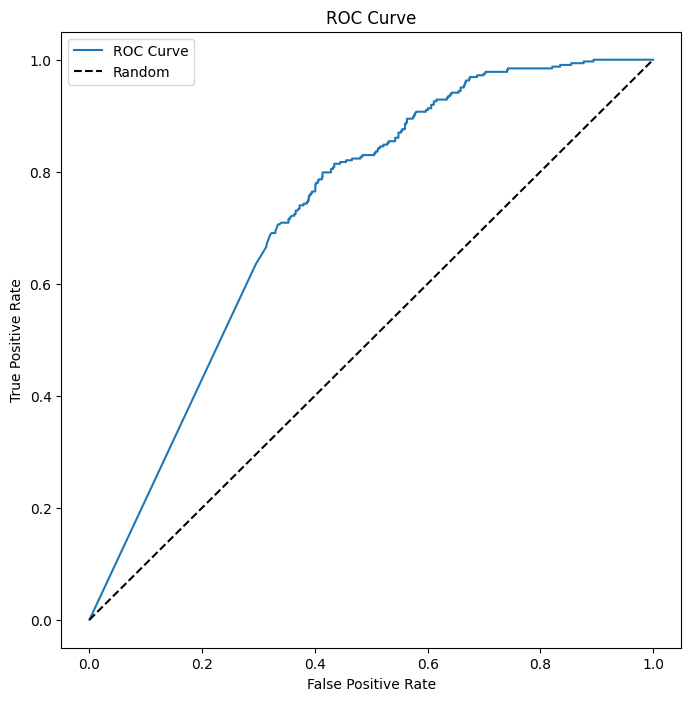

In [296]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Neural Network

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)

X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the neural network architecture
model = nn.Sequential(
    nn.Linear(40, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.Sigmoid(),
)

# Step 3: Choose a loss function and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Accuracy: {accuracy:.4f}')

print('Training finished')

NameError: ignored

In [ ]:
import time

from IPython.display import clear_output

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
def subset_ind(dataset, ratio: float):
    ### YOUR CODE HERE
    return np.random.choice(len(dataset), size=int(ratio*len(dataset)), replace=False)

In [ ]:
val_size = 0.2
val_inds = subset_ind(dataset, val_size)

train_dataset = Subset(dataset, [i for i in range(len(dataset)) if i not in val_inds])
val_dataset = Subset(dataset, val_inds)

print(f'  training size: {len(train_dataset)}\nvalidation size: {len(val_dataset)}')

In [ ]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# create network again just in case
model = nn.Sequential(
    nn.Linear(40, 30),
    nn.ReLU(),
    nn.Linear(30, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.Sigmoid(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []

    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            ### YOUR CODE HERE

            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            ### YOUR CODE HERE
            ep_train_loss.append(loss.item())

        model.train(False) # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                ### YOUR CODE HERE

                # compute predictions
                ### YOUR CODE HERE
                ep_val_loss.append(### YOUR CODE HERE)
                y_pred = ### YOUR CODE HERE
                ep_val_accuracy.append(### YOUR CODE HERE)

        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [ ]:
n_epochs = 30

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

In [ ]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)

In [ ]:
plot_train_process(train_loss, val_loss, val_accuracy)

In [ ]:
# Moddel Training

# Видео Ютуб

# NN

# initialize bias - посмотри как лучше начинать с нуля или с рандома

# SOFTPLUS | SIGMOID | ReLU | ARGMAX |

# GRADIENT BOOSTING

# DROPOUT

# Cross Entropy of 1 class = - log(output)
# Cross Entropy of 2 class = - log(output)
# Cross Entropy sum = class1 + class2
# backpropagation


# KFOLD

# BACKPROPAGATION
# MSE for squared residuals - sum of squared residuals end up being a curve
# then using Gradient Descent we finding optimal value for biased term

# SOFTMAX - for training, ARGMAX - for result


In [ ]:
# Model Evaluation
# AUC ROC

In [ ]:
# testing on test data

In [ ]:
# result